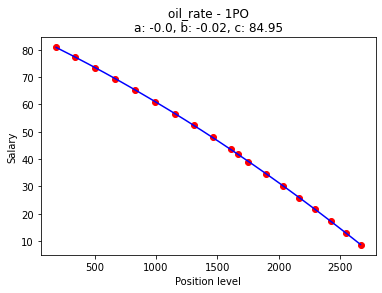

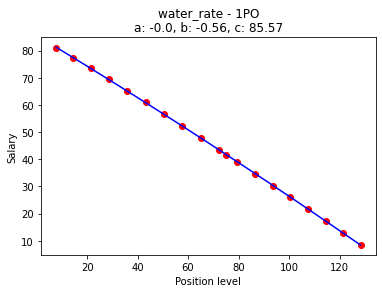

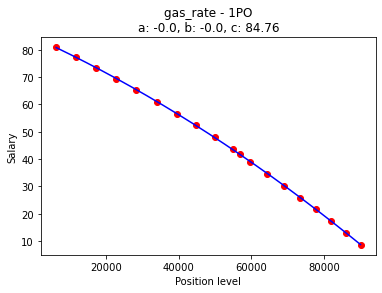

well         a_oil     b_oil       c_oil     a_wat     b_wat  \
0      1PO -2.680078e-06 -0.021424   84.945385 -0.000331 -0.558887   
1      3PO -2.471364e-04 -0.214081  204.418948 -0.000144 -0.507123   
2      8PO -1.803075e-06 -0.062644  208.831695 -0.002255 -1.466831   
3    1021G -4.467358e-07 -0.009108   86.615424 -0.000062 -0.230417   
4    1011G -1.249638e-07 -0.003222   94.163503 -0.000012 -0.115066   
..     ...           ...       ...         ...       ...       ...   
114   1115 -4.698590e-07 -0.014023  196.461912 -0.000090 -0.127080   
115   1116 -3.666860e-05 -0.162589  200.894189 -0.002453 -0.955774   
116   1117 -1.213510e-06 -0.038968  205.225176 -0.000230 -0.347443   
117   1118 -1.858400e-05 -0.186336  210.825370 -0.023173 -4.349034   
118   5070 -8.055181e-05 -0.431492  204.125005 -0.005312 -2.389778   

          c_wat         a_gas     b_gas       c_gas      PI_oil    PI_wat  \
0     85.574703 -2.641155e-09 -0.000607   84.760584   36.613397  1.671321   
1    207.679053 -1.555572e-07 -0.005371  204.418948    3.867258  2.209905   
2    207.661541 -1.134925e-09 -0.001572  208.831695   20.922718  0.857034   
3     88.475904 -5.400074e-10 -0.000244   86.098496   89.345518  4.037153   
4     96.140472 -1.580164e-10 -0.000063   92.597749  227.496065  8.888198   
..          ...           ...       ...         ...         ...       ...   
114  194.117009 -2.980779e-10 -0.000351  196.415611   85.296179  7.901950   
115  199.709479 -2.308063e-08 -0.004079  200.894189    7.186751  1.109343   
116  203.879767 -7.638302e-10 -0.000978  205.225176   32.616977  3.300395   
117  209.983768 -1.169749e-08 -0.004675  210.825370    6.697250  0.267681   
118  203.598539 -5.070242e-08 -0.010826  204.125005    2.729136  0.469169   

          PI_gas  
0    1245.468441  
1     154.143951  
2     833.952655  
3    3022.789452  
4    8162.259764  
..           ...  
114  3399.448392  
115   286.454674  
116  1300.070783  
117   266.943776  
118   108.779845  

[119 rows x 13 columns]

In [51]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures


def get_data(filename):
    # загружаем данные
    df = pd.read_csv (filename, sep="\t",)

    # меняем названия колонок
    col_names=['well', 'dates', 'BHP', 'oil_rate', 'water_rate','gas_rate', 'mas_oil_rate','mas_gas_rate','PI_oil', 'PI_water','PI_gas']
    df.columns = col_names

    #преобразуем тип данных
    df.iloc[:, 2:10] = df.iloc[:, 2:10].astype(float)

    # удаляем выбросы
    df = df[df['oil_rate']>=0.9]
    
    return df
    
# полиномиальная регрессия
def get_reg_coeffs(df_temp, word, N_set_graphs, well):
    X = df_temp[word].values.reshape(-1, 1)
    y = df_temp['BHP'].values
     
    coefs = np.polyfit(X.flatten(), y, 2)    
    
    # Построение полинома
    if N_set_graphs>0:
        poly_reg = PolynomialFeatures(degree=2)
        X_poly = poly_reg.fit_transform(X)
        lin_reg2 = LinearRegression()
        lin_reg2.fit(X_poly,y)

        X_grid = np.arange(min(X),max(X),0.1)
        X_grid = X_grid.reshape(len(X_grid),1) 
        plt.scatter(X,y, color='red') 

        plt.plot(X_grid, lin_reg2.predict(poly_reg.fit_transform(X_grid)),color='blue')

        plt.title(f"{word} - {well}\n{''', '''.join(list(map(lambda x: f'{x[0]}: {str(round(x[1], 2))}', zip(['a','b','c'], coefs))))}")
        plt.xlabel('Position level')
        plt.ylabel('Salary')
        plt.show()
    
    return coefs
    
def plotting(X, y, well, a_oil ,b_oil,c_oil):
    fig = plt.figure()
    plt.plot(X, y, label='data')
    plt.title(f'well:{well} \n a_oil:{a_oil:.2f},  b_oil:{b_oil:.2f}, c_oil:{c_oil:.2f}')
    
    plt.xlabel('oil_rate', size=12)
    plt.ylabel('BHP', rotation=0, size=12)
    plt.grid()
    plt.show(fig)
    
    plt.plot(X_grid, lin_reg2.predict(poly_reg.fit_transform(X_grid)), color='blue') 

    plt.title("Polynomial")
    plt.xlabel('BHP')
    plt.ylabel('oil_rate')
    plt.show()
    #break

# итерируемся по уникальным названиям скважин

def get_new_PI(df_temp, word):
    PI = df_temp[word].values.reshape(-1,1)
    PI=sum(PI)/len(PI)
    
    return PI


def get_ipr_data(path, path_save, N_set_graphs):
    
    df = get_data(path)
    result = pd.DataFrame(columns=['well','a_oil','b_oil','c_oil','a_wat','b_wat','c_wat','a_gas','b_gas','c_gas','PI_oil','PI_wat','PI_gas'])
    wells = df['well'].unique()
    for well in wells[0:]:
        
        df_temp = df[df['well']==well]
        a_oil, b_oil, c_oil = get_reg_coeffs(df_temp, 'oil_rate', N_set_graphs, well)
        a_wat, b_wat, c_wat = get_reg_coeffs(df_temp, 'water_rate', N_set_graphs, well)
        a_gas, b_gas, c_gas = get_reg_coeffs(df_temp, 'gas_rate', N_set_graphs, well)
        
        
        PI_oil=get_new_PI(df_temp,'PI_oil')
        PI_wat=get_new_PI(df_temp,'PI_water')
        PI_gas = get_new_PI(df_temp,'PI_gas')
        
        result = result.append({'well': well, 'a_oil':a_oil, 'b_oil':b_oil, 'c_oil':c_oil, 'a_wat':a_wat, 'b_wat':b_wat, 'c_wat':c_wat,
                            'a_gas':a_gas, 'b_gas':b_gas, 'c_gas':c_gas, 'PI_oil':float(PI_oil), 'PI_wat':float(PI_wat), 
                                'PI_gas':float(PI_gas)}, ignore_index=True)
        N_set_graphs-=1
    
    result.to_csv(path_save, sep = '\t', index = False)
    
    return result


N_set_graphs = 1

path      = r'/Users/marchhelena/Desktop/Python/IPR_point.txt'
path_save = r'/Users/marchhelena/Desktop/Python/Result.txt'
result = get_ipr_data(path, path_save, N_set_graphs)
display(result)